In [269]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from matplotlib import rc, font_manager
rc('font', family='NanumGothic')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score 

import scipy
import scipy.cluster.hierarchy as sch

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

import mglearn
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import random
import json
import folium

from math import radians, sin,cos,atan2,sqrt

## Education 변수

In [456]:
edu= pd.read_csv('서울시 교육정도별 인구.txt', engine='python', sep= '	', encoding ='utf-8', header=[0,1])

In [457]:
edu.columns = ['_'.join(col) for col in edu.columns.values]

In [458]:
edu.columns

Index(['기간_기간', '자치구_자치구', '성별_성별', '연령_연령', '합계_합계', '재학_계', '재학_초등학교',
       '재학_중학교', '재학_고등학교', '재학_대학', '재학_대학교', '재학_대학원', '졸업_계', '졸업_초등학교',
       '졸업_중학교', '졸업_고등학교', '졸업_대학', '졸업_대학교', '졸업_대학원', '중퇴_계', '중퇴_초등학교',
       '중퇴_중학교', '중퇴_고등학교', '중퇴_대학', '중퇴_대학교', '중퇴_대학원', '수료_계', '수료_대학',
       '수료_대학교', '수료_대학원', '안받았음(미취학포함)_안받았음(미취학포함)'],
      dtype='object')

In [459]:
edu= edu[['자치구_자치구', '연령_연령','재학_대학', '합계_합계',
          '재학_대학교', '재학_대학원','졸업_대학', '졸업_대학교', '졸업_대학원','수료_대학',
       '수료_대학교', '수료_대학원']]

In [460]:
edu = edu[~(edu['자치구_자치구']=='서울시')]

In [461]:
edu = edu[~(edu['연령_연령']=='계')]

In [462]:
cols= ['합계_합계','재학_대학', '재학_대학교', '재학_대학원', '졸업_대학', '졸업_대학교',
       '졸업_대학원', '수료_대학', '수료_대학교', '수료_대학원']

In [463]:
edu[cols] = edu[cols].replace({',': '', '-':'0'}, regex=True)

In [464]:
edu.iloc[:,2:] = edu.iloc[:,2:].astype('int')

In [465]:
edu_TT=edu[['자치구_자치구','합계_합계']]

In [471]:
edu=edu[['자치구_자치구', '연령_연령','재학_대학', '재학_대학교', '재학_대학원', '졸업_대학', '졸업_대학교',
       '졸업_대학원', '수료_대학', '수료_대학교', '수료_대학원']]

In [483]:
edu.iloc[:,2:] = edu.iloc[:,2:].astype('int')

In [484]:
edu.loc[:,'Total'] = edu.sum(axis=1)

In [485]:
edu_t = edu.groupby('자치구_자치구').agg({'Total':sum})

In [486]:
edu_t.reset_index(inplace=True)

In [487]:
edu_t.columns = ['자치구', 'Total']

In [488]:
dong= pd.read_csv('original_data_3.csv')

In [489]:
pop= dong.groupby('자치구').agg({'인구':sum})

In [490]:
pop.reset_index(inplace=True)

In [491]:
mer=edu_t.merge(pop, on = '자치구')

In [492]:
mer.head()

,자치구,Total,인구
0,강남구,648104,547453
1,강동구,371700,431920
2,강북구,204604,322915
3,강서구,479212,603611
4,관악구,466600,520040


In [493]:
mer['percent']=mer.Total/mer.인구

In [494]:
mer.sort_values(by='percent', ascending= False)

,자치구,Total,인구,percent
0,강남구,648104,547453,1.183853
14,서초구,512484,438163,1.169620
11,동작구,398216,409385,0.972718
17,송파구,646112,673507,0.959325
12,마포구,367284,386359,0.950629
4,관악구,466600,520040,0.897239
18,양천구,411328,468145,0.878634
8,노원구,480002,548160,0.875660
1,강동구,371700,431920,0.860576
5,광진구,318664,371063,0.858787


In [ ]:
edu_TT=edu_TT.groupby('자치구_자치구').agg({'합계_합계':sum})

In [498]:
edu_TT.reset_index(inplace=True)

In [502]:
edu_TT.columns =['자치구', '교육학력_합계']

In [503]:
mer=mer.merge(edu_TT, on = '자치구')

In [505]:
mer['percent2'] = mer.Total/mer.교육학력_합계

In [508]:
mer.sort_values(by='percent2', ascending= False)

,자치구,Total,인구,percent,교육학력_합계,percent2
14,서초구,512484,438163,1.169620,779384,0.657550
0,강남구,648104,547453,1.183853,1014600,0.638778
17,송파구,646112,673507,0.959325,1182504,0.546393
11,동작구,398216,409385,0.972718,746842,0.533200
12,마포구,367284,386359,0.950629,700936,0.523991
20,용산구,203740,245090,0.831286,402474,0.506219
19,영등포구,342520,403600,0.848662,676642,0.506206
4,관악구,466600,520040,0.897239,948262,0.492058
22,종로구,138142,163026,0.847362,281012,0.491588
13,서대문구,273338,323080,0.846038,569358,0.480081


In [509]:
mer.sort_values(by='percent', ascending= False)

,자치구,Total,인구,percent,교육학력_합계,percent2
0,강남구,648104,547453,1.183853,1014600,0.638778
14,서초구,512484,438163,1.169620,779384,0.657550
11,동작구,398216,409385,0.972718,746842,0.533200
17,송파구,646112,673507,0.959325,1182504,0.546393
12,마포구,367284,386359,0.950629,700936,0.523991
4,관악구,466600,520040,0.897239,948262,0.492058
18,양천구,411328,468145,0.878634,876008,0.469548
8,노원구,480002,548160,0.875660,1063136,0.451496
1,강동구,371700,431920,0.860576,830740,0.447432
5,광진구,318664,371063,0.858787,670376,0.475351


In [536]:
dong_1 = dong.merge(mer, how= 'inner', on ='자치구')

In [537]:
dong_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 34 columns):
Unnamed: 0      424 non-null int64
Unnamed: 0.1    424 non-null int64
자치구             424 non-null object
동               424 non-null object
총가구             424 non-null int64
면적_동            424 non-null float64
store_총_개소      424 non-null float64
백화점_개소          424 non-null float64
백화점_건물연면적       424 non-null float64
복합쇼핑몰_개소        424 non-null float64
복합쇼핑몰_건물연면적     424 non-null float64
전문점_개소          424 non-null float64
전문점_건물연면적       424 non-null float64
합계_사업체수         424 non-null int64
총_수급자_가구        424 non-null float64
㎡당 매매평균가        424 non-null float64
㎡당 전세평균가        424 non-null float64
수입차합계           424 non-null float64
수입화물차           424 non-null float64
수입특수차           424 non-null float64
주택건설현황          424 non-null int64
인구_x            424 non-null int64
면적              424 non-null float64
인구밀도            424 non-null int64
행정구역코드          424 non

In [541]:
dong_1.인구_x.head()

0     9818
1     3073
2    10537
3    19105
4     8260
Name: 인구_x, dtype: int64

In [542]:
dong_1['edu_percent']= dong_1.Total*dong_1.구별_인구_비율

In [543]:
dong_1['edu_eduT_percent']= dong_1.percent2*dong_1.구별_인구_비율

In [544]:
dong_1=dong_1[[ '자치구', '동','edu_percent', 'edu_eduT_percent','인구_x']]

In [545]:
dong_1.sort_values(by='edu_percent', ascending= False)

,자치구,동,edu_percent,edu_eduT_percent,인구_x
354,서초구,양재1동,54636.436879,0.070102,46713
374,강남구,세곡동,53800.209844,0.053026,45445
377,강남구,대치2동,47547.097106,0.046863,40163
304,동작구,상도1동,46998.796908,0.062930,48317
364,강남구,역삼1동,43638.013755,0.043010,36861
365,강남구,역삼2동,43591.843479,0.042965,36822
258,강서구,화곡1동,43416.482874,0.040892,54687
235,양천구,신정3동,42876.448690,0.048945,48799
188,은평구,진관동,42572.182666,0.047455,56487
367,강남구,도곡2동,41084.442347,0.040493,34704


In [546]:
dong_1['edu_per'] = dong_1.edu_percent/dong_1.인구_x

In [549]:
dong_1.sort_values(by='edu_per', ascending= False)

,자치구,동,edu_percent,edu_eduT_percent,인구_x,edu_per
357,강남구,신사동,21087.977510,0.020785,17813,1.183853
374,강남구,세곡동,53800.209844,0.053026,45445,1.183853
362,강남구,대치1동,30294.804047,0.029859,25590,1.183853
373,강남구,수서동,19440.053820,0.019160,16421,1.183853
372,강남구,일원2동,19643.676575,0.019361,16593,1.183853
365,강남구,역삼2동,43591.843479,0.042965,36822,1.183853
358,강남구,논현1동,28484.692465,0.028075,24061,1.183853
360,강남구,삼성1동,18056.129399,0.017796,15252,1.183853
363,강남구,대치4동,25174.638846,0.024812,21265,1.183853
364,강남구,역삼1동,43638.013755,0.043010,36861,1.183853


In [550]:
dong_1.columns

Index(['자치구', '동', 'edu_percent', 'edu_eduT_percent', '인구_x', 'edu_per'], dtype='object')

In [552]:
dong_1 = dong_1[['자치구', '동', 'edu_percent']]

# 최종파일 변수선택

In [554]:
data = pd.read_csv('final_data.csv')

In [557]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [567]:
data.columns

Index(['자치구', '동', 'edu_percent', '동별_친환경자동차수', '총가구', '면적_동', 'store_총_개소',
       '백화점_개소', '백화점_건물연면적', '복합쇼핑몰_개소', '복합쇼핑몰_건물연면적', '전문점_개소', '전문점_건물연면적',
       '합계_사업체수', '총_수급자_가구', '㎡당 매매평균가', '㎡당 전세평균가', '수입차합계', '수입화물차',
       '수입특수차', '주택건설현황', '인구', '면적', '인구밀도', '행정구역코드', '구별_인구_비율', '가구수_비율',
       '동별_승용차수', '가구수별_승용차수', '동별_수소차_대수'],
      dtype='object')

In [559]:
data.corr()

,edu_percent,동별_친환경자동차수,총가구,면적_동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,...,주택건설현황,인구,면적,인구밀도,행정구역코드,구별_인구_비율,가구수_비율,동별_승용차수,가구수별_승용차수,동별_수소차_대수
edu_percent,1.000000,0.741534,0.803880,0.255042,0.016145,0.069152,0.040269,0.021713,0.000927,-0.016864,...,0.339898,0.915766,0.255042,0.181929,0.458821,0.480597,0.388264,0.658041,0.182081,0.435398
동별_친환경자동차수,0.741534,1.000000,0.426152,0.193667,0.070145,0.126086,0.046167,-0.006751,0.049902,0.012142,...,0.413769,0.531935,0.193667,0.014769,0.475968,0.192436,0.130165,0.920828,0.602827,0.727652
총가구,0.803880,0.426152,1.000000,0.180996,0.026753,0.004970,-0.024025,0.081150,-0.022606,-0.036510,...,0.087922,0.887671,0.180996,0.241090,0.278619,0.586079,0.666828,0.286249,-0.284450,0.164227
면적_동,0.255042,0.193667,0.180996,1.000000,0.009631,0.015215,0.033160,0.142153,0.091913,0.030065,...,0.133409,0.247657,1.000000,-0.546973,0.091656,0.176271,0.121438,0.182553,0.090107,0.186457
store_총_개소,0.016145,0.070145,0.026753,0.009631,1.000000,0.415153,0.354839,0.121255,0.138595,0.478232,...,0.031883,0.015890,0.009631,-0.125104,-0.046990,0.087620,0.101986,0.084174,0.107967,0.074327
백화점_개소,0.069152,0.126086,0.004970,0.015215,0.415153,1.000000,0.612082,0.014600,0.128386,0.169663,...,0.047348,0.027065,0.015215,-0.108343,0.069741,-0.026461,-0.044331,0.115996,0.167994,0.069631
백화점_건물연면적,0.040269,0.046167,-0.024025,0.033160,0.354839,0.612082,1.000000,0.001277,0.061855,0.325645,...,0.089019,0.015945,0.033160,-0.092117,0.080122,-0.045660,-0.064958,0.067972,0.107709,0.015074
복합쇼핑몰_개소,0.021713,-0.006751,0.081150,0.142153,0.121255,0.014600,0.001277,1.000000,0.615034,-0.025978,...,-0.031047,0.046727,0.142153,-0.031298,0.037929,0.022646,0.030018,-0.025166,-0.032436,-0.032634
복합쇼핑몰_건물연면적,0.000927,0.049902,-0.022606,0.091913,0.138595,0.128386,0.061855,0.615034,1.000000,-0.015977,...,0.009426,-0.002161,0.091913,-0.072537,0.040675,-0.022481,-0.039631,0.037685,0.098631,0.023670
전문점_개소,-0.016864,0.012142,-0.036510,0.030065,0.478232,0.169663,0.325645,-0.025978,-0.015977,1.000000,...,0.040942,-0.031560,0.030065,-0.103598,-0.075987,0.046176,0.045862,0.075005,0.110816,0.055911


In [690]:
data_t.columns

Index(['자치구', '동', 'edu_percent', '동별_친환경자동차수', '총가구', '면적_동', 'store_총_개소',
       '백화점_개소', '백화점_건물연면적', '복합쇼핑몰_개소', '복합쇼핑몰_건물연면적', '전문점_개소', '전문점_건물연면적',
       '합계_사업체수', '총_수급자_가구', '㎡당 매매평균가', '㎡당 전세평균가', '수입차합계', '수입화물차',
       '수입특수차', '주택건설현황', '인구', '면적', '인구밀도', '행정구역코드', '구별_인구_비율', '가구수_비율',
       '동별_승용차수', '가구수별_승용차수', '동별_수소차_대수', '택시'],
      dtype='object')

In [698]:
X=data_t[['edu_percent','store_총_개소',
       '백화점_개소',
       '합계_사업체수','㎡당 매매평균가',
       '동별_수소차_대수', '동별_승용차수', '가구수별_승용차수', '동별_친환경자동차수']]
y=data_t[['택시']]

# edu_percent
# store_총_개소
# 합계_사업체수
# ㎡당 매매평균가
# 동별_친환경자동차수
# 동별_수소차_대수
# 가구수별_승용차수

# <1>
# 백화점 개소


C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

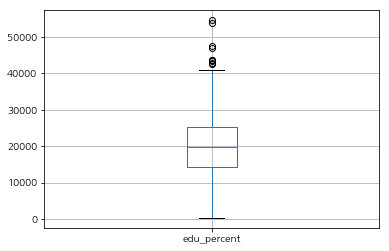

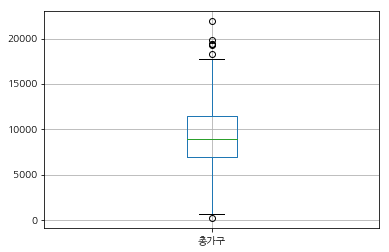

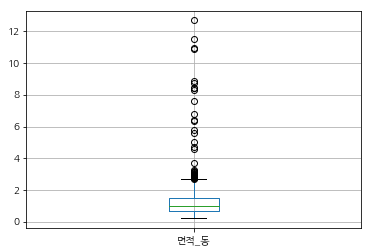

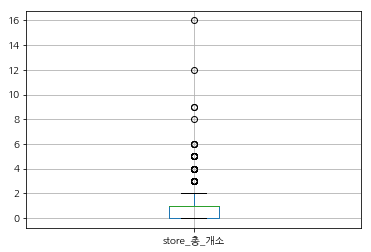

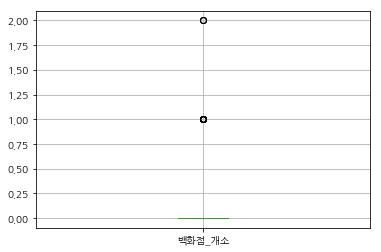

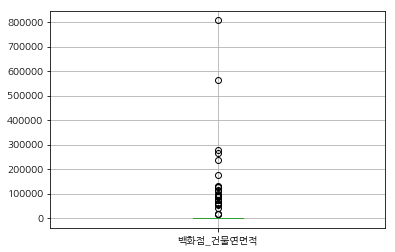

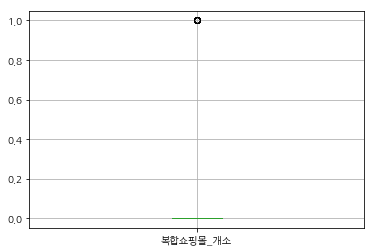

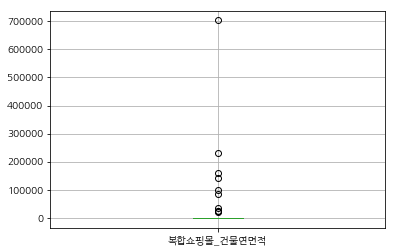

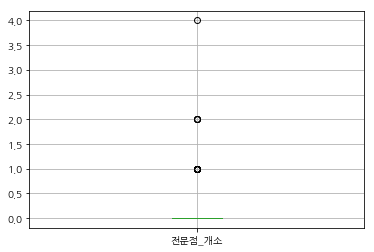

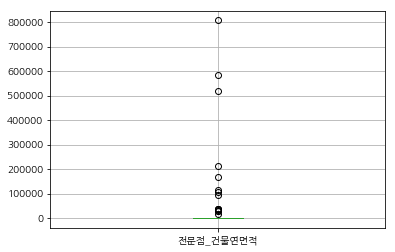

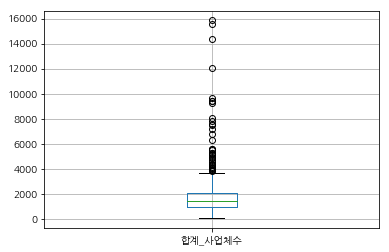

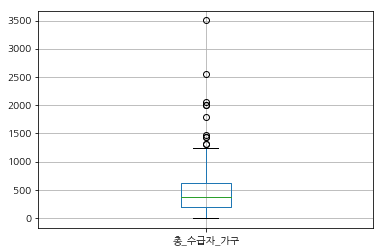

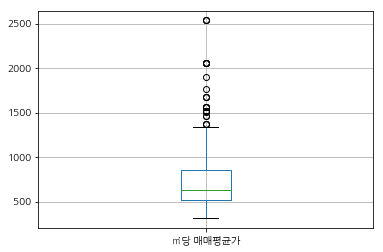

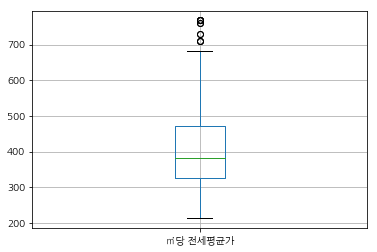

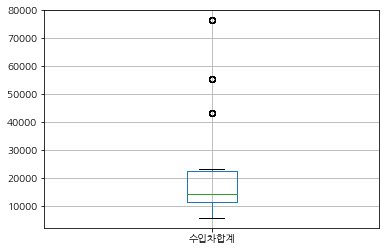

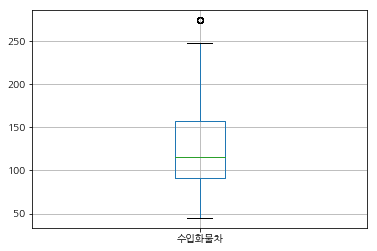

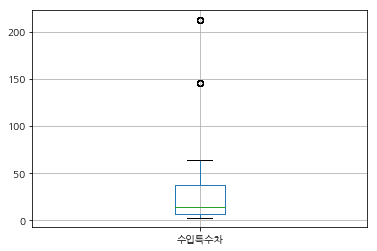

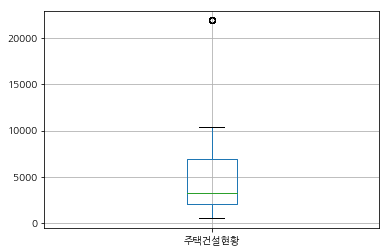

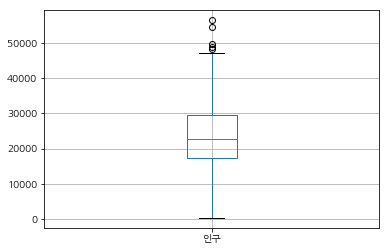

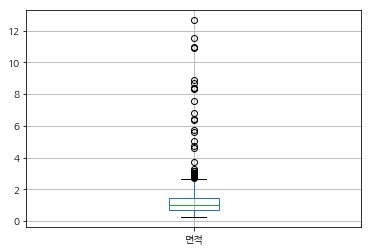

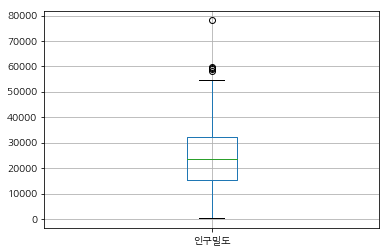

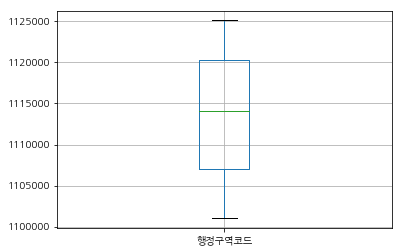

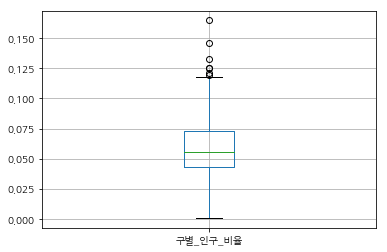

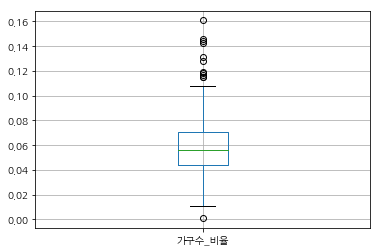

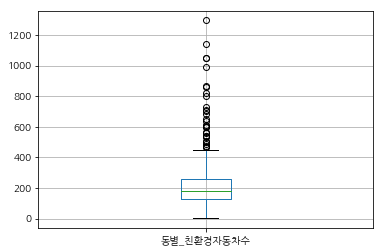

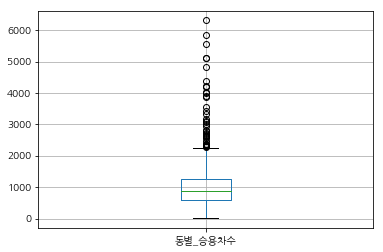

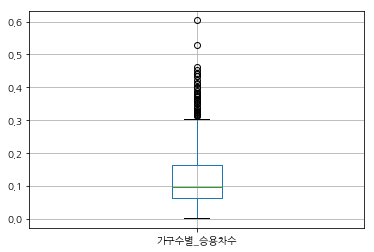

In [631]:
for column in X:
    plt.figure()
    data.boxplot([column])

In [632]:
scaler = preprocessing.StandardScaler()

In [633]:
names = X.columns

In [634]:
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


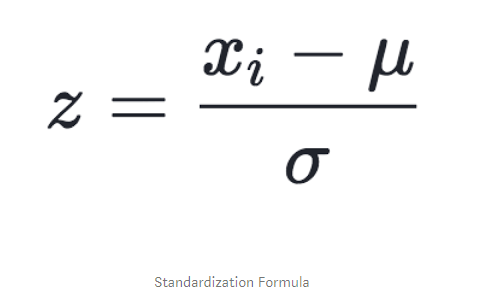

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

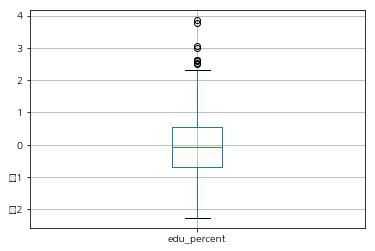

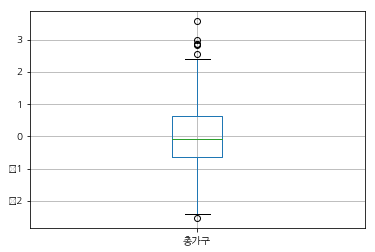

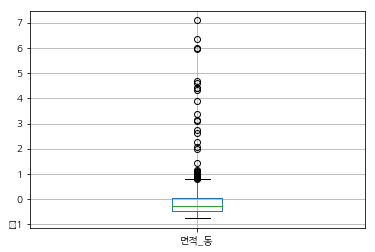

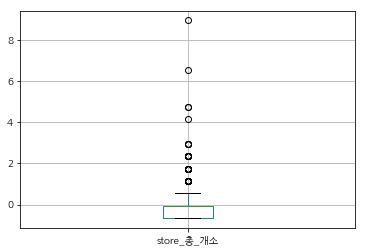

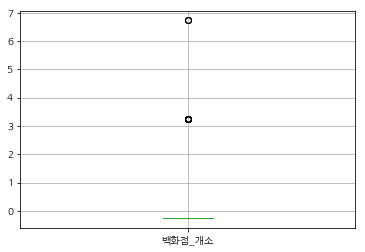

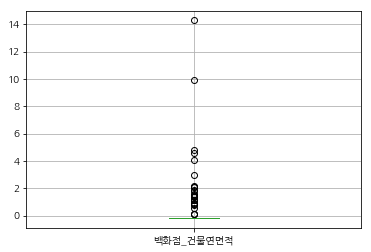

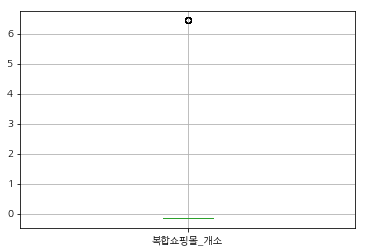

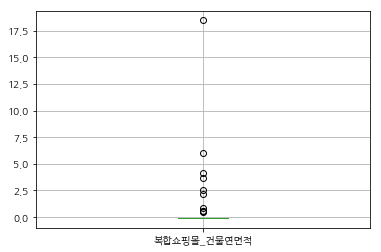

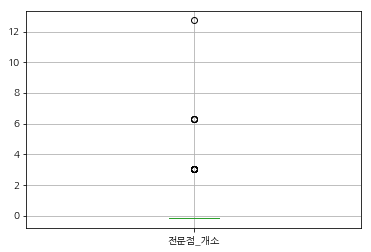

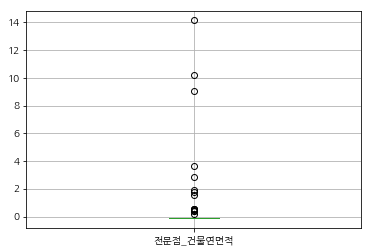

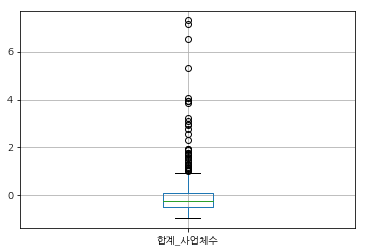

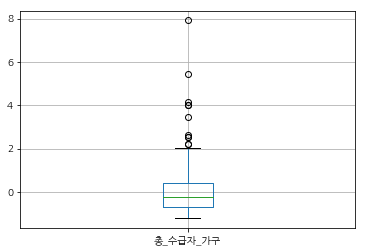

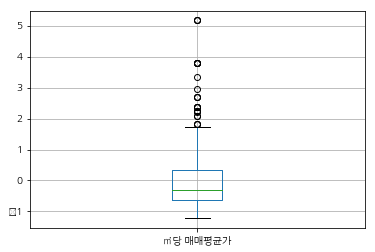

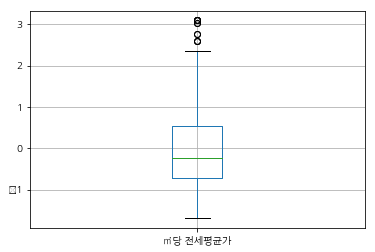

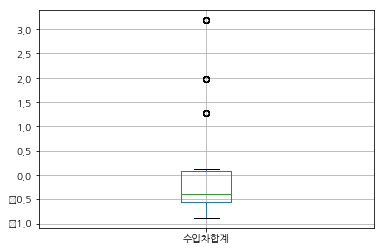

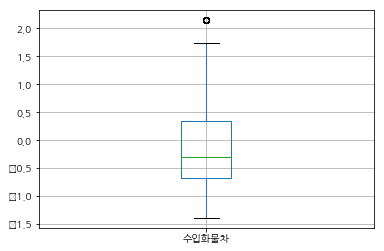

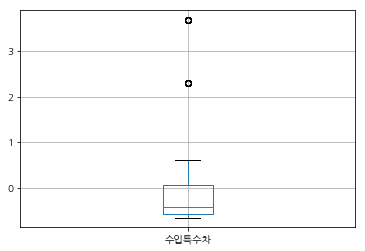

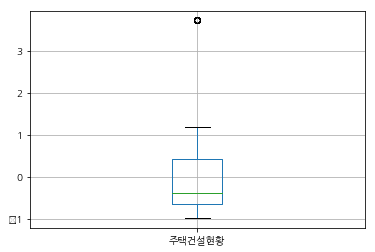

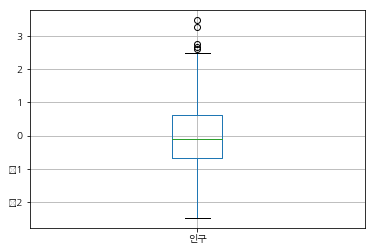

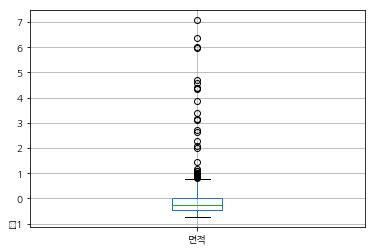

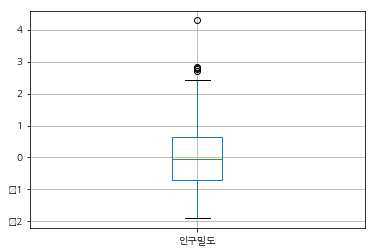

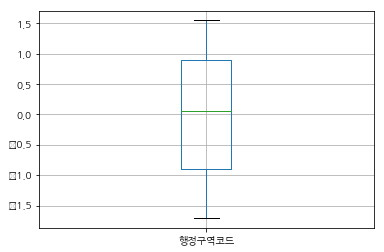

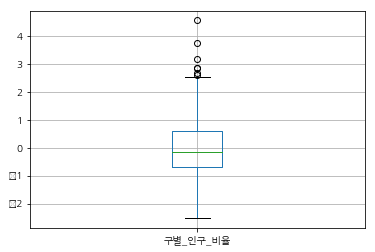

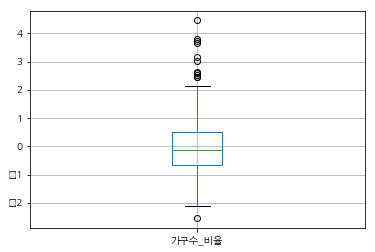

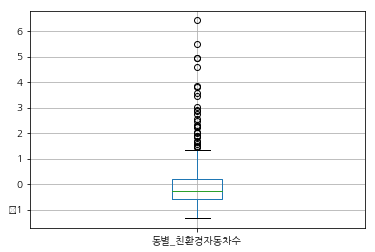

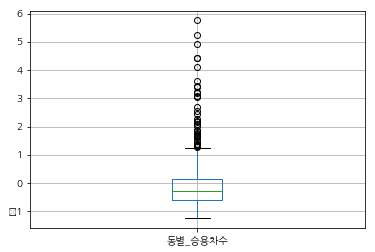

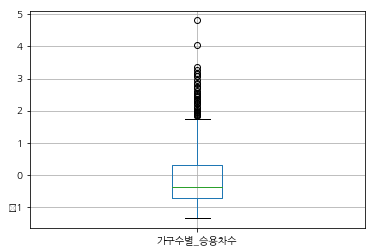

In [635]:
for column in scaled_df:
    plt.figure()
    scaled_df.boxplot([column])

In [27]:
normalized_X = preprocessing.normalize(X)

In [28]:
standardized_X = preprocessing.scale(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [102]:
model = sm.OLS(y_train, X_train).fit()

In [701]:
predictions = model.predict(X)

In [702]:
X.columns

Index(['edu_percent', 'store_총_개소', '백화점_개소', '합계_사업체수', '㎡당 매매평균가',
       '동별_수소차_대수', '동별_승용차수', '가구수별_승용차수', '동별_친환경자동차수'],
      dtype='object')

In [703]:
model.summary()

# <동별_친환경자동차수>
# edu_percent
# 백화점 개소
# 사업체수
# ㎡당 매매평균가 (애매)
# 수입차합계
# 동별_수소차_대수
# 주택건설현황 (점수는 높으면 애매)



# <가구수별_승용차수>
# edu_percent
# 합계_사업체수	
# ㎡당 매매평균가	
# 수입차합계
# 동별_친환경자동차수
# 동별_수소차_대수

# 동별_승용차수
# store_총_개소


# <동별_수소차_대수>
# edu_percent
# store_총_개소	
# 합계_사업체수	
# 수입특수차
# 주택건설현황
# 가구수_비율	
# 동별_승용차수	
# 가구수별_승용차수	

# <1차 최종>
# edu_percent
# store_총_개소
# 합계_사업체수
# ㎡당 매매평균가
# 수입차합계
# 동별_친환경자동차수
# 동별_승용차수	
# 동별_수소차_대수
# 가구수별_승용차수

# <1>
# 백화점 개소


# <Final>
# edu_percent
# store_총_개소
# 합계_사업체수
# ㎡당 매매평균가
# 동별_친환경자동차수
# 동별_수소차_대수
# 가구수별_승용차수

# <1>
# 백화점 개소

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     택시   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 19 Aug 2019   Prob (F-statistic):          1.13e-105
Time:                        17:49:01   Log-Likelihood:                -7724.7
No. Observations:                 339   AIC:                         1.547e+04
Df Residuals:                     330   BIC:                         1.550e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
edu_percent    6.7e+04   1.44e+04      4.656      0.000    3.87e+04    9.53e+04
store_총_개소  -5.808e+07   8.75e+07     -0.664      0.507    -2.3e+08    1.14e+08
백화점_개소      -2.562e+08   4.33e+08     -0.592      0.554   -1.11e+09    5.96e+08
합계_사업체수      1.312e+05   7.35e+04      1.786      0.075   -1.33e+04    2.76e+05
㎡당 매매평균가     2.288e+06   3.84e+05      5.953      0.000    1.53e+06    3.04e+06
동별_수소차_대수   -9.451e+08   5.24e+08     -1.804      0.072   -1.98e+09    8.56e+07
동별_승용차수     -1.988e+06    4.9e+05     -4.062      0.000   -2.95e+06   -1.03e+06
가구수별_승용차수    3.711e+09   2.11e+09      1.761      0.079   -4.34e+08    7.86e+09
동별_친환경자동차수   1.005e+07   1.81e+06      5.565      0.000     6.5e+06    1.36e+07
==============================================================================
Omnibus:                       20.246   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.292
Skew:                           0.174   Prob(JB):                      0.00960
Kurtosis:                       2.267   Cond. No.                     4.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [645]:
data.columns

Index(['자치구', '동', 'edu_percent', '동별_친환경자동차수', '총가구', '면적_동', 'store_총_개소',
       '백화점_개소', '백화점_건물연면적', '복합쇼핑몰_개소', '복합쇼핑몰_건물연면적', '전문점_개소', '전문점_건물연면적',
       '합계_사업체수', '총_수급자_가구', '㎡당 매매평균가', '㎡당 전세평균가', '수입차합계', '수입화물차',
       '수입특수차', '주택건설현황', '인구', '면적', '인구밀도', '행정구역코드', '구별_인구_비율', '가구수_비율',
       '동별_승용차수', '가구수별_승용차수', '동별_수소차_대수'],
      dtype='object')

In [646]:
a= data[[ 'edu_percent', '동별_친환경자동차수','store_총_개소',
       '백화점_개소','합계_사업체수','㎡당 매매평균가', '수입차합계','동별_승용차수', '가구수별_승용차수', '동별_수소차_대수' ]]

In [650]:
a.corr()

,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,수입차합계,동별_승용차수,가구수별_승용차수,동별_수소차_대수
edu_percent,1.000000,0.741534,0.016145,0.069152,0.126667,0.205494,0.353384,0.658041,0.182081,0.435398
동별_친환경자동차수,0.741534,1.000000,0.070145,0.126086,0.241057,0.508082,0.757239,0.920828,0.602827,0.727652
store_총_개소,0.016145,0.070145,1.000000,0.415153,0.608982,0.055059,0.039250,0.084174,0.107967,0.074327
백화점_개소,0.069152,0.126086,0.415153,1.000000,0.176916,0.215370,0.147351,0.115996,0.167994,0.069631
합계_사업체수,0.126667,0.241057,0.608982,0.176916,1.000000,0.059242,0.145579,0.235116,0.131142,0.282672
㎡당 매매평균가,0.205494,0.508082,0.055059,0.215370,0.059242,1.000000,0.772871,0.631031,0.711910,0.574546
수입차합계,0.353384,0.757239,0.039250,0.147351,0.145579,0.772871,1.000000,0.822509,0.805461,0.734506
동별_승용차수,0.658041,0.920828,0.084174,0.115996,0.235116,0.631031,0.822509,1.000000,0.758070,0.846830
가구수별_승용차수,0.182081,0.602827,0.107967,0.167994,0.131142,0.711910,0.805461,0.758070,1.000000,0.656739
동별_수소차_대수,0.435398,0.727652,0.074327,0.069631,0.282672,0.574546,0.734506,0.846830,0.656739,1.000000


In [669]:
taxi=pd.read_csv('taxi_traffic.csv')

In [672]:
taxi.columns=['자치구', '동', '택시']

In [682]:
set(data.동)- set(taxi.동)

{'면목3.8동'}

In [686]:
taxi[(taxi.동=='면목3.8동')]

,자치구,동,택시
415,중랑구,면목3.8동,1.024267e+09


In [684]:
taxi.동 = taxi.동.replace({'면목제3.8동':'면목3.8동'})

In [687]:
data_t = data.merge(taxi, how='inner', on =['자치구', '동'])

In [688]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 31 columns):
자치구            424 non-null object
동              424 non-null object
edu_percent    424 non-null float64
동별_친환경자동차수     424 non-null float64
총가구            424 non-null int64
면적_동           424 non-null float64
store_총_개소     424 non-null float64
백화점_개소         424 non-null float64
백화점_건물연면적      424 non-null float64
복합쇼핑몰_개소       424 non-null float64
복합쇼핑몰_건물연면적    424 non-null float64
전문점_개소         424 non-null float64
전문점_건물연면적      424 non-null float64
합계_사업체수        424 non-null int64
총_수급자_가구       424 non-null float64
㎡당 매매평균가       424 non-null float64
㎡당 전세평균가       424 non-null float64
수입차합계          424 non-null float64
수입화물차          424 non-null float64
수입특수차          424 non-null float64
주택건설현황         424 non-null int64
인구             424 non-null int64
면적             424 non-null float64
인구밀도           424 non-null int64
행정구역코드         424 non-null float64
구별_인구_비

In [705]:
data_total = data_t[['자치구', '동', 'edu_percent', '동별_친환경자동차수','store_총_개소',
       '백화점_개소','합계_사업체수','㎡당 매매평균가',  '행정구역코드','가구수별_승용차수', '동별_수소차_대수', '택시' ]]
# <Final>
# edu_percent
# store_총_개소
# 합계_사업체수
# ㎡당 매매평균가
# 동별_친환경자동차수
# 동별_수소차_대수
# 가구수별_승용차수
# 택시
# <1>
# 백화점 개소

In [706]:
data_total.to_csv('data_total.csv')

# DATA_TOTAL

In [270]:
data_total=pd.read_csv('data_total.csv')

In [271]:
data_total.drop('Unnamed: 0', axis =1 ,inplace=True)

In [272]:
data_total.head()

,자치구,동,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시
0,종로구,사직동,8319.397863,95.695177,0.0,0.0,3544,756.0,1101053.0,0.144169,0.569495,1.653815e+09
1,종로구,삼청동,2603.942721,29.952259,0.0,0.0,753,716.0,1101054.0,0.150556,0.170688,1.689370e+09
2,종로구,부암동,8928.650976,102.703207,0.0,0.0,567,345.0,1101055.0,0.147209,0.598577,1.597098e+09
3,종로구,평창동,16188.846626,186.214745,0.0,0.0,739,421.0,1101056.0,0.164524,0.971080,1.496236e+09
4,종로구,무악동,6999.208224,80.509489,0.0,0.0,531,809.0,1101057.0,0.164636,0.419559,1.654529e+09


In [273]:
data_total.describe()

,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,424.000000,424.000000,4.240000e+02
mean,20393.933962,224.523585,1.101415,0.073113,1940.714623,738.923939,1.113659e+06,0.132830,0.344340,3.516850e+09
std,8896.494830,167.210881,1.666411,0.286552,1903.805918,348.332548,7.406174e+03,0.098007,0.414676,2.102383e+09
min,272.802602,2.548947,0.000000,0.000000,102.000000,315.000000,1.101053e+06,0.001876,0.008307,1.053597e+08
25%,14407.742501,127.919507,0.000000,0.000000,962.250000,520.750000,1.107070e+06,0.064347,0.125129,1.654351e+09
50%,19704.855530,177.462681,1.000000,0.000000,1458.000000,626.250000,1.114068e+06,0.095624,0.201705,3.404922e+09
75%,25189.322043,258.842592,1.000000,0.000000,2103.000000,855.000000,1.120318e+06,0.163627,0.363529,5.621767e+09
max,54636.436879,1296.725646,16.000000,2.000000,15851.000000,2538.000000,1.125074e+06,0.603239,3.033190,7.092599e+09


In [274]:
data_total['clus']=pd.cut(data_total.동별_친환경자동차수 ,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [275]:
data_total.clus.unique()

[1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [276]:
df = data_total.copy()

In [277]:
x=df[['edu_percent', '동별_친환경자동차수', 
       '합계_사업체수', '㎡당 매매평균가',  '가구수별_승용차수', '동별_수소차_대수','택시']]

In [278]:
x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = StandardScaler().fit_transform(x_scaled)
df1 = pd.DataFrame(x_scaled)

In [279]:
df1['sum1']=df1.sum(axis = 1, skipna = True) 

In [280]:
df.iloc[:,2:12].columns

Index(['edu_percent', '동별_친환경자동차수', 'store_총_개소', '백화점_개소', '합계_사업체수',
       '㎡당 매매평균가', '행정구역코드', '가구수별_승용차수', '동별_수소차_대수', '택시'],
      dtype='object')

In [281]:
df1.columns=['edu_percent', '동별_친환경자동차수', '합계_사업체수',
       '㎡당 매매평균가', '가구수별_승용차수', '동별_수소차_대수', '택시', 'sum1']

In [282]:
df=df[['자치구', '동','clus']]

In [283]:
df.head()

,자치구,동,clus
0,종로구,사직동,1
1,종로구,삼청동,1
2,종로구,부암동,1
3,종로구,평창동,2
4,종로구,무악동,1


In [284]:
df_norm=df.merge(df1,left_index=True,right_index=True)

In [285]:
X=df_norm.iloc[:,3:11]

In [286]:
y=df_norm.iloc[:,2]

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=9)

In [288]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))

In [289]:
x = np.divide(x, 255.)

In [290]:
# 10 clusters
n_clusters = len(np.unique(y))
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
# Evaluate the K-Means clustering accuracy.
metrics.accuracy_score(y, y_pred_kmeans)

0.20047169811320756

In [291]:
# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.labels_)
print(kmeans.predict(X))

[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 0 2 0 0 0 2 2 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 2 1 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 2 2 2 0 0 2 0 0 2 0 0 0 0]
[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2

In [292]:
X_train.head()

,edu_percent,동별_친환경자동차수,합계_사업체수,㎡당 매매평균가,가구수별_승용차수,동별_수소차_대수,택시,sum1
236,0.226337,-0.112175,-0.621971,0.333627,0.013694,-0.493184,1.031516,0.377844
302,0.785467,0.841984,1.760284,-0.456781,0.350421,0.141602,1.495407,4.918385
332,0.211369,-0.489509,-0.142890,-0.393548,-0.979922,-0.547315,1.371790,-0.970026
288,-0.579880,-0.127036,0.617012,-0.347561,0.095205,-0.194422,1.486056,0.949375
211,-0.205199,-0.302310,0.054316,0.437099,-0.058330,0.164052,-0.074272,0.015356


Text(0, 0.5, '특성 1')

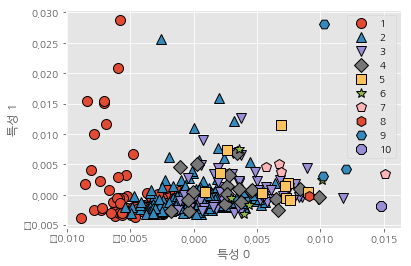

In [293]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x)

mglearn.discrete_scatter(x[:, 0], x[:, 2], y)
plt.legend([1,2,3,4,5,6,7,8,9,10], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## PCA

In [294]:
X=X[['edu_percent', '동별_친환경자동차수', '합계_사업체수', '㎡당 매매평균가', '가구수별_승용차수', '동별_수소차_대수', '택시']]

In [295]:
X.head()

,edu_percent,동별_친환경자동차수,합계_사업체수,㎡당 매매평균가,가구수별_승용차수,동별_수소차_대수,택시
0,-1.358827,-0.771365,0.843142,0.049080,0.115824,0.543609,-0.887201
1,-2.002025,-1.165003,-0.624600,-0.065888,0.181073,-0.419259,-0.870269
2,-1.290264,-0.729404,-0.722415,-1.132221,0.146886,0.613822,-0.914210
3,-0.473226,-0.229376,-0.631963,-0.913781,0.323766,1.513182,-0.962242
4,-1.507397,-0.862290,-0.741347,0.201413,0.324907,0.181607,-0.886861


In [296]:
a = X.corr().abs()

s = a.unstack()

so = s.sort_values(kind="quicksort", ascending =False)

so[27:]
# 가구수_비율       구별_인구_비율(Delete)       0.905872
# 구별_인구_비율     가구수_비율         0.905872
# 인구(Delete)           총가구          0.887671
# 총가구          인구             0.887671
# ㎡당 전세평균가 (Delete)    ㎡당 매매평균가       0.855438
# ㎡당 매매평균가     ㎡당 전세평균가       0.855438

edu_percent  택시             0.243800
택시           edu_percent    0.243800
동별_친환경자동차수   합계_사업체수        0.241057
합계_사업체수      동별_친환경자동차수     0.241057
㎡당 매매평균가     택시             0.232190
택시           ㎡당 매매평균가       0.232190
edu_percent  ㎡당 매매평균가       0.205494
㎡당 매매평균가     edu_percent    0.205494
가구수별_승용차수    edu_percent    0.182081
edu_percent  가구수별_승용차수      0.182081
택시           가구수별_승용차수      0.163010
가구수별_승용차수    택시             0.163010
합계_사업체수      가구수별_승용차수      0.131142
가구수별_승용차수    합계_사업체수        0.131142
동별_수소차_대수    택시             0.129246
택시           동별_수소차_대수      0.129246
합계_사업체수      edu_percent    0.126667
edu_percent  합계_사업체수        0.126667
택시           합계_사업체수        0.059471
합계_사업체수      택시             0.059471
㎡당 매매평균가     합계_사업체수        0.059242
합계_사업체수      ㎡당 매매평균가       0.059242
dtype: float64

In [297]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [298]:
print(pca.explained_variance_ratio_) 

[0.47938123 0.16029206 0.14214369]


In [299]:
print(pca.singular_values_)

[37.72006767 21.81162122 20.53977787]


In [300]:
print('singular vector :\n', pca.components_.T)

singular vector :
 [[ 0.34151598 -0.57246023 -0.0899914 ]
 [ 0.49669147 -0.23440428 -0.03175989]
 [ 0.16451288 -0.25816478  0.79664129]
 [ 0.40515914  0.44528162 -0.15975656]
 [ 0.42953942  0.45421417 -0.00383739]
 [ 0.46630179  0.11743586  0.20188731]
 [ 0.20857741 -0.36375466 -0.53847948]]


In [301]:
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [3.36360167 1.12469697 0.9973581 ]
explained variance ratio : [0.47938123 0.16029206 0.14214369]


In [302]:
pca = PCA(n_components=3, svd_solver='full')

In [303]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [304]:
print(pca.explained_variance_ratio_) 

[0.47938123 0.16029206 0.14214369]


In [305]:
print(pca.singular_values_) 

[37.72006767 21.81162122 20.53977787]


In [306]:
pca = PCA(n_components=3, svd_solver='arpack')

In [307]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

In [308]:
print(pca.explained_variance_ratio_)

[0.47938123 0.16029206 0.14214369]


In [309]:
print(pca.singular_values_)  

[37.72006767 21.81162122 20.53977787]


In [310]:
X_ = StandardScaler().fit_transform(X)

In [311]:
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

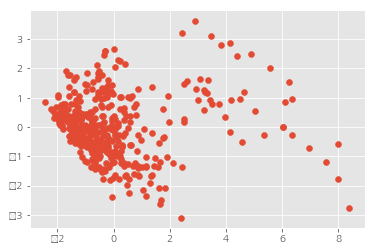

In [312]:
import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1])

ori['bi'] = ori['백화점_개소'].apply(lambda x: 'True' if x > 0 else 'False')

In [313]:
pc_y = np.c_[pc,data_total.clus]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','diagnosis'])

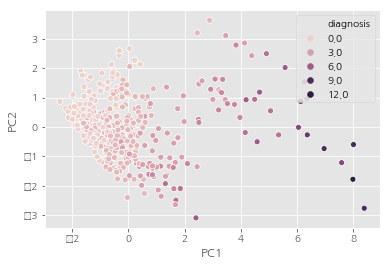

In [314]:
import seaborn as sns
sns.scatterplot(data=df,x='PC1',y='PC2',hue='diagnosis')

In [315]:
data_total['pca1']= ((0.34151598  *data_total.edu_percent)+
            (0.49669147*data_total.동별_친환경자동차수)+
            (0.16451288  *data_total.합계_사업체수)+
            (0.40515914  *data_total['㎡당 매매평균가'])+
            (0.42953942  *data_total.가구수별_승용차수)+
            (0.46630179  *data_total.동별_수소차_대수)+
            (0.20857741 *data_total.택시))

In [316]:
data_total['pca2']= ((-0.57246023 *data_total.edu_percent)+
            (-0.23440428*data_total.동별_친환경자동차수)+
            (-0.25816478*data_total.합계_사업체수)+
            (0.44528162 *data_total['㎡당 매매평균가'])+
            (0.45421417 *data_total.가구수별_승용차수)+
            (0.11743586  *data_total.동별_수소차_대수)+
            (-0.36375466 *data_total.택시))

In [317]:
data_total['pca3']= ((-0.0899914*data_total.edu_percent)+
            (-0.03175989*data_total.동별_친환경자동차수)+
            (0.79664129*data_total.합계_사업체수)+
            (-0.15975656*data_total['㎡당 매매평균가'])+
            (-0.00383739*data_total.가구수별_승용차수)+
            (0.20188731*data_total.동별_수소차_대수)+
            (-0.53847948*data_total.택시))

In [318]:
print(pca.explained_variance_ratio_) 

[0.47938123 0.16029206]


In [319]:
print(pca.singular_values_)

[37.72006767 21.81162122]


In [320]:
data_total['pca']=data_total['pca1']*37.72006767 +data_total['pca2']*21.81162122 +data_total['pca3']*20.53977787

# 방법론 합치기

In [321]:
sum_norm = df_norm[['자치구', '동', 'sum1']]

In [322]:
data_total= data_total.merge(sum_norm, how ='inner', on=['자치구','동'])

In [323]:
data_total['sum_clus']=pd.qcut(data_total['sum1'] ,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [324]:
data_ci=pd.read_csv('data_ci.csv')

In [325]:
data_ci=data_ci[['자치구', '동', 'cluster',
       '총_점수_interval_10', '수소충전소']]

In [326]:
data_total= data_total.merge(data_ci, how ='inner', on=['자치구','동'])

In [327]:
data_total[(data_total.수소충전소 ==1)]

,자치구,동,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,...,clus,pca1,pca2,pca3,pca,sum1,sum_clus,cluster,총_점수_interval_10,수소충전소
192,서대문구,천연동,16111.950204,136.340139,0.0,0.0,941,746.0,1113052.0,0.088278,...,2,5.169250e+08,-9.015051e+08,-1.334519e+09,-2.757556e+10,-2.565358,3,1,5,1
217,마포구,상암동,31893.596888,298.890669,1.0,0.0,2324,777.0,1114074.0,0.153883,...,3,4.594243e+08,-8.012245e+08,-1.186056e+09,-2.450781e+10,2.220485,8,7,9,1
256,강서구,방화2동,19364.226119,315.751824,3.0,0.0,3318,549.0,1116071.0,0.089185,...,3,1.275357e+09,-2.224195e+09,-3.292540e+09,-6.803477e+10,1.009170,8,3,8,1
285,영등포구,여의동,28831.595540,384.595235,2.0,0.0,8082,1209.0,1119054.0,0.172838,...,3,1.397716e+09,-2.437584e+09,-3.608416e+09,-7.456179e+10,8.573373,10,7,10,1
355,서초구,양재2동,28108.296428,422.981365,3.0,0.0,5271,1036.0,1122067.0,0.314933,...,4,8.237500e+08,-1.436601e+09,-2.126626e+09,-4.394311e+10,10.172441,10,4,10,1
377,강남구,대치2동,47547.097106,1146.009288,2.0,0.0,3965,1672.0,1123079.0,0.435855,...,9,1.036889e+09,-1.808309e+09,-2.676867e+09,-5.531287e+10,19.299480,10,5,10,1
415,강동구,천호3동,24584.936099,229.710743,2.0,0.0,1859,601.0,1125063.0,0.090212,...,2,9.497076e+08,-1.656269e+09,-2.451816e+09,-5.066262e+10,-0.232478,6,3,8,1


In [328]:
data_total['pca_clus']=pd.cut(data_total.pca ,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [329]:
data_total.clus=data_total.clus.astype('int')
data_total.sum_clus=data_total.sum_clus.astype('int')
data_total.pca_clus=data_total.pca_clus.astype('int')

In [330]:
data_total.groupby('수소충전소').agg({'cluster':['mean'],
                                'pca':['mean'],
                                '총_점수_interval_10': ['mean'],'sum_clus':['mean'],'sum1':['mean']})

,cluster,pca,총_점수_interval_10,sum_clus,sum1
,mean,mean,mean,mean,mean
수소충전소,,,,,
0,2.882494,-3.896167e+10,5.273381,5.460432,-0.092271
1,4.285714,-4.922836e+10,8.571429,7.857143,5.496730


In [331]:
4.285714/2.882494

1.4868076048033403

In [332]:
-4.922836e+10/-3.896167e+10

1.2635074420577967

In [333]:
8.571429/5.273381

1.625414321476108

In [334]:
7.857143/5.460432

1.4389233306082743

In [264]:
5.496730/-0.092271

-59.57158803957907

# 지도에 나타내기 

In [335]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [336]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'pca'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="pca")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [337]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [338]:
seoul_map

In [72]:
data_total.to_csv('df.csv')

In [73]:
data_total.nlargest(40, 'sum1').groupby(['자치구','동']).agg({'sum1':'first'}).nlargest(40,'sum1')

sum1
자치구  동              
강남구  역삼1동  23.704363
     대치2동  19.299480
     세곡동   18.364857
서초구  양재1동  18.017151
강남구  역삼2동  16.618884
     압구정동  15.067523
     청담동   14.893041
서초구  잠원동   14.779266
강남구  도곡2동  14.764269
     삼성2동  14.656648
서초구  반포1동  14.436248
     서초3동  14.083946
강남구  대치1동  12.870391
서초구  서초4동  12.038129
강남구  개포4동  11.761959
     논현1동  11.745865
     대치4동  11.110524
서초구  반포4동  10.805496
강남구  논현2동  10.790736
     일원본동  10.453774
서초구  양재2동  10.172441
강남구  도곡1동   9.671090
서초구  반포3동   9.357808
     방배4동   8.748328
강남구  삼성1동   8.720086
     개포2동   8.688266
영등포구 여의동    8.573373
서초구  서초1동   8.404901
강남구  신사동    8.295140
     일원1동   8.061049
서초구  방배2동   8.023207
     서초2동   7.686119
     반포2동   7.642006
     방배본동   7.252677
     방배3동   7.179389
강남구  일원2동   6.934460
     수서동    6.760612
강서구  화곡1동   6.629770
서초구  반포본동   6.398648
송파구  잠실3동   6.189733

# 방법론 선택


▶ 수소승용차 : 1800대(2018년) → 8만1000대(2022년) → 620만대(2040년)

2025년까지 연 10만대의 상업적 양산 체계를 갖춰 수소차 가격을 내연기관차 수준으로 낮춘다. 또 2022년까지 막전극접합체 등 핵심부품을 100% 국산화한다.

수소차 1대당 연간 약 200㎏ 사용(1.5만㎞ 주행) 
41.09 하루에 41.09km 주행
일반도로는  시속 60km이니 0.016 시간 *41 = 1시간 4분 정도
자동차 전용도로는 80km 이니 0.0125 시간 *41 = 51분 정도

올해까지 500대 => 500 x 200kg = 100000kg => 100ton
현재 84대 => 84 x 200kg = 16800kg => 16.8ton필요

상암 수소충전소
==> 65kg/day * 297일 = 19305kg
공휴일 일요일 휴무

양재 수소충전소
==> 110kg/day * 297일 = 32670kg
공휴일 일요일 휴무

2개 수소충전소 
1년 충전량 : 51975kg => 51.975ton

월~금요일 수 : 312일
한국 공휴일 수 : 15일
312 - 15일 = 297일

현대차 수소충전소 사양: 250kg/day
250kg * 297 = 74250kg = 74.250ton/year

수소자동차 1년 필요 충전량 : 200kg

74250 / 200 = 371.25개 커버가능?


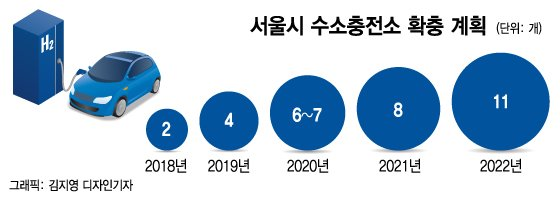

# LPG

## LPG 합치기

In [344]:
lpg = pd.read_csv('lpg_location.csv',engine='python' ,encoding='cp949')

In [345]:
k =pd.DataFrame(set(lpg.행정동)-set(data_total.동))

In [348]:
k['동'] = k[0].str.replace("제","")

In [349]:
k

,0,동
0,독산제2동,독산2동
1,가양제3동,가양3동
2,방화제2동,방화2동
3,면목제5동,면목5동
4,구로제3동,구로3동
5,오류제2동,오류2동
6,길음제2동,길음2동
7,54,54
8,69,69
9,구로제2동,구로2동


In [350]:
for i in range(len(lpg)):
    for p in range(len(k)):
        if lpg['행정동'].iloc[i] == k[0].iloc[p]:
            lpg['행정동'].iloc[i] = k['동'].iloc[p]
            break

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [351]:
lpg.행정동.replace('54','공릉1동', inplace=True)
lpg.행정동.replace('69','중곡1동', inplace=True)
lpg.행정동.replace('중계2·3동','중계2.3동', inplace=True)

In [352]:
lpg.head()

,Unnamed: 0,업체명,주소,crawl,x,y,행정동
0,0,(주)에이치앤디이-서울만남의광장,서울특별시 서초구 양재대로12길 73-71 만남의광장,서울특별시 서초구 양재대로12길 73-71,37.459906,127.039871,양재2동
1,1,강남복지충전소,서울특별시 강남구 밤고개로 200,서울특별시 강남구 밤고개로 200,37.476329,127.103276,세곡동
2,2,(주)상현상사,서울특별시 강남구 학동로 204,서울특별시 강남구 학동로 204,37.513631,127.029157,논현2동
3,3,암사충전소,서울특별시 강동구 올림픽로 791 GS칼텍스,서울특별시 강동구 올림픽로 791,37.551779,127.125545,암사2동
4,4,진양가스,서울특별시 강남구 강남대로58길 61,서울특별시 강남구 강남대로58길 61,37.490583,127.034634,도곡1동


In [353]:
lpg.columns = ['Unnamed: 0', '업체명', '도로주소', '동주소', '경도', '위도', '동']

In [354]:
lpg=lpg[['업체명','동주소', '경도', '위도', '동']]

In [419]:
lpg[lpg.duplicated('업체명')]

,업체명,동주소,경도,위도,동


In [420]:
data_total_gas = data_total.merge(lpg, on=['동'], how='left')

## LPG 고르기

In [358]:
select_dong = data_total[['자치구','동']]

In [359]:
select_dong['num_select']=15

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [360]:
select_dong=select_dong.set_index(['자치구'])

In [361]:
d=select_dong.to_dict()
d1=d['num_select']

In [362]:
d1

{'종로구': 15,
 '중구': 15,
 '용산구': 15,
 '성동구': 15,
 '광진구': 15,
 '동대문구': 15,
 '중랑구': 15,
 '성북구': 15,
 '강북구': 15,
 '도봉구': 15,
 '노원구': 15,
 '은평구': 15,
 '서대문구': 15,
 '마포구': 15,
 '양천구': 15,
 '강서구': 15,
 '구로구': 15,
 '금천구': 15,
 '영등포구': 15,
 '동작구': 15,
 '관악구': 15,
 '서초구': 15,
 '강남구': 15,
 '송파구': 15,
 '강동구': 15}

In [363]:
top_5 = data_total_gas.groupby(['자치구'])\
.apply(lambda x: x.nlargest(d1[x.name],'sum1'))\
.reset_index(drop=True)

In [364]:
top_5=top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소','업체명', '동주소', '경도', '위도']]

In [365]:
top_5=top_5.sort_values('sum1',ascending=False)

In [366]:
top_5_drop=top_5.dropna().reset_index(drop=True)

In [367]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [368]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [369]:
top_5_drop=top_5_drop[(top_5_drop.총_점수_interval_10>7)].reset_index(drop=True)

In [370]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['동']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [371]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [372]:
seoul_map

In [373]:
top_5_drop

,자치구,동,sum1,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도
0,강남구,세곡동,18.364857,10,0,강남복지충전소,서울특별시 강남구 밤고개로 200,37.476329,127.103276
1,강남구,세곡동,18.364857,10,0,(주)수서에너지,서울특별시 강남구 밤고개로 127,37.482796,127.102826
2,서초구,잠원동,14.779266,10,0,(주)영동가스,서울특별시 서초구 잠원로 181,37.518893,127.009666
3,강남구,논현2동,10.790736,10,0,(주)상현상사,서울특별시 강남구 학동로 204,37.513631,127.029157
4,서초구,양재2동,10.172441,10,1,(주)에이치앤디이-서울만남의광장,서울특별시 서초구 양재대로12길 73-71,37.459906,127.039871
5,서초구,방배3동,7.179389,9,0,서초충전소,서울특별시 서초구 남부순환로 2224,37.473066,126.993278
6,강서구,화곡1동,6.629770,9,0,대흥에너지산업(주),서울특별시 강서구 곰달래로24길 19,37.529724,126.845029
7,송파구,오금동,5.464928,10,0,오금가스충전소,서울특별시 송파구 마천로 103,37.506158,127.129408
8,송파구,잠실본동,5.370023,10,0,강동LPG충전소,서울특별시 송파구 삼전로 47,37.503449,127.084675
9,영등포구,문래동,4.918385,9,0,(주)세지,서울특별시 영등포구 선유로 37,37.517433,126.886258


# LPG + 주차장  

In [448]:
parking = pd.read_csv('juchajang_final.csv',encoding= 'cp949')

In [454]:
kk= pd.DataFrame(set(parking.행정구역) - set(data_total.동))

In [450]:
kk['동'] = kk[0].str.replace("제","")

In [455]:
kk

,0
0,NaN


In [452]:
for i in range(len(parking)):
    for p in range(len(kk)):
        if parking['행정구역'].iloc[i] == kk[0].iloc[p]:
            parking['행정구역'].iloc[i] = kk['동'].iloc[p]
            break

In [453]:
parking.행정구역.replace('여의도동','여의동', inplace=True)
parking.행정구역.replace('종로1·2·3·4가동','종로1.2.3.4가동', inplace=True)
parking.행정구역.replace('상계3·4동','상계3.4동', inplace=True)
parking.행정구역.replace('금호2·3가동','금호2.3가동', inplace=True)

In [427]:
parking.head()

,Unnamed: 0,주차장관리번호,주차장명,주차장구분,주차장유형,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,관리기관명,전화번호,위도,경도_x,데이터기준일자,제공기관코드,제공기관명,Unnamed: 33,도로명주소,행정구역
0,0,115-2-000001,화곡본-2,공영,노외,100,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2607-1570,37.544121,126.848553,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 초록마을로5길 46,화곡본동
1,1,115-2-000002,화곡2-1,공영,노외,60,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2607-1419,37.535981,126.850238,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 강서로18바길 16-11,화곡8동
2,2,115-2-000003,화곡3-1,공영,노외,99,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2603-1573,37.541702,126.832546,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 양천구 월정로50길 22,신월5동
3,3,115-2-000004,화곡4-1,공영,노외,138,5,미시행,평일,07:00,...,서울특별시 강서구청,02-2645-1574,37.541702,126.825979,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 양천구 화곡로3길 27-8,신월5동
4,4,115-2-000006,화곡5-2,공영,노외,25,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2604-8688,37.544177,126.838548,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 강서로 200,우장산동


In [456]:
parking.columns=['Unnamed: 0', '주차장관리번호', '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분',
       '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각',
       '공휴일운영시작시각', '공휴일운영종료시각', '주차요금정보', '주차기본시간', '주차기본요금', '추가단위시간',
       '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '관리기관명',
       '전화번호', '주차위도', '주차경도', '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 33',
       '도로명주소', '동']

In [457]:
parking=parking[['주차장명','주차장구분', '주차장유형',
                '주차구획수',
       '주차급지구분', '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '주차요금정보', '주차기본시간', '주차기본요금',
               '주차경도', '주차위도', '동' ]]

In [458]:
parking.주차장유형.unique()

array(['노외', '노상', '부설'], dtype=object)

In [459]:
parking=parking[(parking.주차장구분=='공영')&(parking['주차구획수']>10)].reset_index(drop=True)

In [460]:
parking = parking[~(parking.주차장유형=='노상')].reset_index()

In [461]:
parking[parking.duplicated('주차장명')]

,index,주차장명,주차장구분,주차장유형,주차구획수,주차급지구분,주차부제시행구분,주차운영요일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,주차요금정보,주차기본시간,주차기본요금,주차경도,주차위도,동
57,71,개봉1동 마을공동,공영,노외,56,5,요일제,평일,09:00,18:00,23:59,23:59,유료,5,50,126.844893,37.505741,개봉1동
59,73,개봉1동 노외,공영,노외,134,4,요일제,평일+토요일+공휴일,00:00,23:59,00:00,23:59,유료,5,100,126.844893,37.505741,개봉1동
73,107,도산대로25길32,공영,노외,26,1,요일제,평일,09:00,19:00,00:00,00:00,유료,5,400,127.056453,37.497679,대치4동
75,109,도곡로421,공영,노외,29,1,요일제,평일,09:00,19:00,00:00,00:00,유료,5,400,127.056453,37.497679,대치4동
90,124,구룡산제1호,공영,노외,92,3,요일제,평일,09:00,19:00,00:00,00:00,유료,5,200,127.067285,37.476067,개포1동
92,126,구룡산제2호,공영,노외,132,3,요일제,평일,09:00,19:00,00:00,00:00,유료,5,200,127.067285,37.476067,개포1동
101,135,대청역,공영,노외,168,4,요일제,평일+토요일+공휴일,00:00,00:00,00:00,00:00,유료,5,100,127.079320,37.494916,일원2동
103,137,밤고개로21길,공영,노외,110,4,요일제,평일+토요일+공휴일,00:00,00:00,00:00,00:00,유료,5,100,127.079320,37.494916,일원2동
180,270,용산주차빌딩,공영,노외,565,2,미시행,평일+토요일+공휴일,00:00,00:00,00:00,00:00,유료,5,250,127.002074,37.539028,한남동
182,272,한강진역,공영,노외,180,2,미시행,평일+토요일+공휴일,00:00,00:00,00:00,00:00,유료,5,250,127.002074,37.539028,한남동


In [462]:
parking.drop_duplicates(subset ="주차장명", 
                     keep = 'first', inplace=True)

In [463]:
parking=parking[['주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분',
       '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각',
       '주차요금정보', '주차기본시간', '주차기본요금',  '주차경도','주차위도', '동']]

In [464]:
parking.reset_index(drop=True, inplace=True)

In [465]:
data_total_gas_pk = data_total_gas.merge(parking, on=['동'], how='left')

## 주차장 고르기

In [394]:
select_dong = data_total[['자치구','동']]

In [395]:
select_dong['num_select']=10

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [396]:
select_dong=select_dong.set_index(['자치구'])

In [397]:
d=select_dong.to_dict()
d1=d['num_select']

In [398]:
d1

{'종로구': 10,
 '중구': 10,
 '용산구': 10,
 '성동구': 10,
 '광진구': 10,
 '동대문구': 10,
 '중랑구': 10,
 '성북구': 10,
 '강북구': 10,
 '도봉구': 10,
 '노원구': 10,
 '은평구': 10,
 '서대문구': 10,
 '마포구': 10,
 '양천구': 10,
 '강서구': 10,
 '구로구': 10,
 '금천구': 10,
 '영등포구': 10,
 '동작구': 10,
 '관악구': 10,
 '서초구': 10,
 '강남구': 10,
 '송파구': 10,
 '강동구': 10}

In [399]:
a_top_5 = data_total_gas_pk.groupby(['자치구'])\
.apply(lambda x: x.nlargest(d1[x.name],'sum1'))\
.reset_index(drop=True)

In [400]:
a_top_5.columns

Index(['자치구', '동', 'edu_percent', '동별_친환경자동차수', 'store_총_개소', '백화점_개소',
       '합계_사업체수', '㎡당 매매평균가', '행정구역코드', '가구수별_승용차수', '동별_수소차_대수', '택시', 'clus',
       'pca1', 'pca2', 'pca3', 'pca', 'sum1', 'sum_clus', 'cluster',
       '총_점수_interval_10', '수소충전소', 'pca_clus', '업체명', '동주소', '경도', '위도',
       '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분', '주차부제시행구분', '주차운영요일',
       '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각', '주차요금정보', '주차기본시간',
       '주차기본요금', '주차경도', '주차위도'],
      dtype='object')

In [401]:
a_top_5=a_top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소','업체명', '동주소', '경도', '위도',
             '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차위도', '주차경도']]

In [402]:
a_top_5=a_top_5.sort_values('sum1',ascending=False)

In [403]:
a_top_5 = a_top_5.reset_index(drop=True)

In [404]:
pc_top_5=a_top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소',
             '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차위도', '주차경도']]

In [405]:
pc_top_5

,자치구,동,sum1,총_점수_interval_10,수소충전소,주차장명,주차장구분,주차장유형,주차구획수,주차위도,주차경도
0,강남구,역삼1동,23.704363,10,0,도곡로21길7,공영,노외,78.0,37.492593,127.038872
1,강남구,역삼1동,23.704363,10,0,역삼1동문화센터,공영,노외,118.0,37.495374,127.033282
2,강남구,역삼1동,23.704363,10,0,역삼문화공원,공영,노외,59.0,37.502514,127.030390
3,강남구,대치2동,19.299480,10,1,대치2동문화센터,공영,노외,158.0,37.502306,127.064187
4,강남구,대치2동,19.299480,10,1,학여울역,공영,노외,182.0,37.495109,127.069857
5,강남구,세곡동,18.364857,10,0,대왕초교,공영,노외,100.0,37.464621,127.105589
6,강남구,세곡동,18.364857,10,0,대왕초교,공영,노외,100.0,37.464621,127.105589
7,서초구,양재1동,18.017151,10,0,양재주차빌딩,공영,노외,98.0,37.478566,127.041321
8,강남구,역삼2동,16.618884,10,0,도곡로327,공영,노외,22.0,37.496157,127.051666
9,강남구,압구정동,15.067523,10,0,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
pc_top_5_drop=pc_top_5.dropna().reset_index(drop=True)

In [407]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [408]:
pc_top_5_drop=pc_top_5_drop[(pc_top_5_drop.총_점수_interval_10>8)].reset_index(drop=True)

In [409]:
pc_top_5_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
자치구                 48 non-null object
동                   48 non-null object
sum1                48 non-null float64
총_점수_interval_10    48 non-null int64
수소충전소               48 non-null int64
주차장명                48 non-null object
주차장구분               48 non-null object
주차장유형               48 non-null object
주차구획수               48 non-null float64
주차위도                48 non-null float64
주차경도                48 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.2+ KB


In [410]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['자치구']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [411]:
for i in range(len(pc_top_5_drop.loc[:,['주차위도','주차경도']])):
    folium.Marker(
        location=pc_top_5_drop.loc[i,['주차위도','주차경도']].dropna(),
        popup=pc_top_5_drop.loc[i,['자치구']],
        icon=folium.Icon(color='gray')
    ).add_to(seoul_map)

In [412]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [413]:
seoul_map

# 거리 군집화

In [470]:
data_total_gas_pk.to_csv('data_total_final.csv')

In [471]:
data_total_gas_pk = pd.read_csv('data_total_final.csv')

In [475]:
data_gas=data_total_gas_pk[['자치구', '동','sum1', 'sum_clus','총_점수_interval_10', '수소충전소', '업체명', '동주소', '경도', '위도' ]]

In [476]:
data_gas[data_gas.duplicated('업체명')].dropna()

,자치구,동,sum1,sum_clus,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도
168,강북구,수유1동,-5.582651,1,1,0,국제가스공업(주),서울특별시 강북구 덕릉로24길 6,37.634290,127.019657
169,강북구,수유1동,-5.582651,1,1,0,국제가스공업(주),서울특별시 강북구 덕릉로24길 6,37.634290,127.019657
170,강북구,수유1동,-5.582651,1,1,0,국제가스공업(주),서울특별시 강북구 덕릉로24길 6,37.634290,127.019657
283,양천구,신월1동,-0.951737,6,5,0,(주)대흥가스,서울특별시 양천구 남부순환로 411,37.531077,126.829739
284,양천구,신월1동,-0.951737,6,5,0,(주)대흥가스,서울특별시 양천구 남부순환로 411,37.531077,126.829739
291,양천구,신월5동,-2.341178,4,2,0,비케이서비스산업(주),서울특별시 양천구 남부순환로 311,37.538971,126.824442
292,양천구,신월5동,-2.341178,4,2,0,비케이서비스산업(주),서울특별시 양천구 남부순환로 311,37.538971,126.824442
295,양천구,신월7동,-0.904973,6,4,0,(주)남양가스,서울특별시 양천구 남부순환로 538,37.520579,126.835024
303,양천구,신정7동,1.148857,8,7,0,복지신정충전소,서울특별시 양천구 안양천로 669,37.507135,126.868977
304,양천구,신정7동,1.148857,8,7,0,복지신정충전소,서울특별시 양천구 안양천로 669,37.507135,126.868977


In [477]:
data_gas.drop_duplicates(subset ="업체명", 
                     keep = 'first', inplace=True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [479]:
import numbers
import math

class GeoUtil:
    """
    Geographical Utils
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [480]:
data_gas.dropna(inplace=True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [481]:
# 수소충전소가 이미 있는 지역은 제외
data_gas=data_gas[~(data_gas['자치구']=='강서구')]
data_gas=data_gas[~(data_gas['자치구']=='서초구')]

In [482]:
data_gas=data_gas[(data_gas['총_점수_interval_10']>7)]

In [483]:
data_gas.reset_index(drop=True, inplace=True)

In [484]:
len(data_gas)

20

In [486]:
dist = [[0 for i in range(len(data_gas))] for j in range(len(data_gas))]

In [487]:
for i in range(len(data_gas)):
    for j in range(len(data_gas)):
        dist[i][j] = GeoUtil.get_euclidean_distance(data_gas.iloc[i,9],data_gas.iloc[i,8],data_gas.iloc[j,9],data_gas.iloc[j,8])

L = sch.linkage(dist, method='single')

In [490]:
dis=pd.DataFrame(dist)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


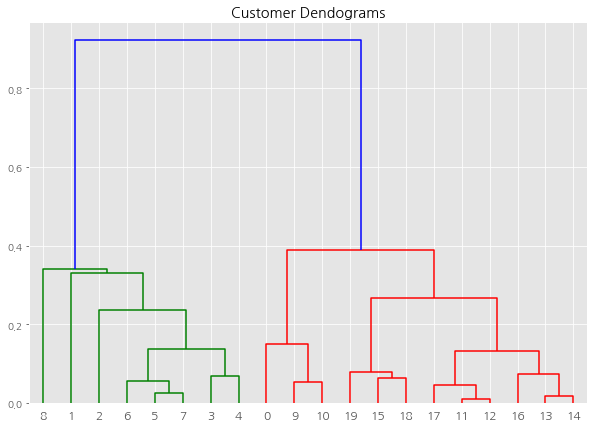

In [492]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dis, method='complete'))

In [493]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster.fit_predict(dis)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [494]:
data_gas['comp_clus']=pd.DataFrame(cluster.fit_predict(dis))

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [495]:
data_gas

,자치구,동,sum1,sum_clus,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도,comp_clus
0,동대문구,장안1동,0.354721,7,8,0,장안동가스충전소,서울특별시 동대문구 천호대로 353,37.562897,127.056468,2
1,은평구,진관동,2.014596,8,8,0,은평서부충전소,서울특별시 은평구 통일로 1186,37.643634,126.919024,0
2,양천구,신정3동,4.723433,9,9,0,수도에너지(주),서울특별시 양천구 신정로 146,37.506887,126.836814,0
3,양천구,신정4동,3.185930,9,9,0,목동충전소,서울특별시 양천구 목동로 193,37.525600,126.861875,0
4,구로구,구로2동,3.805830,9,8,0,한일가스산업(주),서울특별시 구로구 경인로 537,37.501882,126.875666,0
5,영등포구,양평1동,0.949375,8,8,0,양평동충전소,서울특별시 영등포구 선유로 157,37.527936,126.888910,0
6,영등포구,양평2동,1.442763,8,8,0,기린에너지,서울특별시 영등포구 선유로52길 5,37.536256,126.896764,0
7,영등포구,문래동,4.918385,9,9,0,(주)세지,서울특별시 영등포구 선유로 37,37.517433,126.886258,0
8,동작구,대방동,3.624785,9,9,0,동일석유(주)동주충전소,서울특별시 동작구 상도로 74,37.499417,126.926646,3
9,강남구,논현2동,10.790736,10,10,0,(주)상현상사,서울특별시 강남구 학동로 204,37.513631,127.029157,2


In [496]:
data_gas.groupby(['comp_clus','자치구','동']).agg({'sum1':'mean'})

sum1
comp_clus 자치구  동              
0         구로구  구로2동   3.805830
          양천구  신정3동   4.723433
               신정4동   3.185930
          영등포구 문래동    4.918385
               양평1동   0.949375
               양평2동   1.442763
          은평구  진관동    2.014596
1         강남구  세곡동   18.364857
               일원2동   6.934460
          강동구  둔촌2동   1.762095
               성내2동  -0.661485
          송파구  석촌동    3.914528
               오금동    5.464928
               잠실본동   5.370023
2         강남구  논현2동  10.790736
               도곡1동   9.671090
          동대문구 장안1동   0.354721
3         동작구  대방동    3.624785

In [498]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [499]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [500]:
top_5_drop=top_5_drop[(top_5_drop.총_점수_interval_10>7)].reset_index(drop=True)

In [501]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['동']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [502]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [503]:
seoul_map

# 총정리

In [504]:
# 1. 수소자동차 대수를 입력받는다. 
hydrogen_car = input("Enter the num of hydrogen car : ")

# 2. 수소자동차 대수를 기반으로 hybrid 충전소의 개수 K를 구한다. 
total_charge_needed = 200 * int(hydrogen_car) # 총 필요 충전량
total_charge_needed -= 237600
if total_charge_needed <0:
    total_charge_needed = 0
num_of_hybrid = math.floor(total_charge_needed / 142560) # hybrid 충전소 개수
num_of_converged = num_of_hybrid # 융복합충전소 개수
num_of_mobile = 3 * num_of_converged # 이동식 충전소 개수
num_of_off_site = math.floor(total_charge_needed / 57520) # 필요한 off_site 개수

print("hybrid충전소 개수 : ", num_of_hybrid)
print("이동식 충전소 개수", num_of_mobile)

Enter the num of hydrogen car : 3000
hybrid충전소 개수 :  2
이동식 충전소 개수 6


In [ ]:
# 